# Load libraries

In [1]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load data

In [3]:
corpus = pd.read_excel('cleaned_corpus.xlsx')
corpus.head()

,title,link,date_published,text,source,like_count,reply_parent_id,cleaned_text
0,DOJ on 'slow' pace of Alice Guo case: 'We cann...,https://www.rappler.com/philippines/doj-respon...,2024-08-28 10:24:17,"MANILA, Philippines – The Department of Justic...",rappler,NaN,NaN,manila philippin depart justic doj defend stra...
1,Lawyer who notarized Alice Guo's counter affid...,https://www.rappler.com/philippines/lawyer-not...,2024-08-28 07:00:00,"CLARK FREEPORT, Philippines – The lawyer who n...",rappler,NaN,NaN,clark freeport philippin lawyer notar counter ...
2,Alice Guo and siblings fled Philippines by boat,https://www.rappler.com/philippines/alice-guo-...,2024-08-27 13:20:33,"MANILA, Philippines – Dismissed Bamban, Tarlac...",rappler,NaN,NaN,manila philippin dismiss bamban tarlac mayor a...
3,"Alice Guo's sister, Porac POGO staff to face S...",https://www.rappler.com/philippines/alice-guo-...,2024-08-27 10:03:09,"MANILA, Philippines – After an embarrassing la...",rappler,NaN,NaN,manila philippin embarrass laps let dismiss ma...
4,"Cassandra Ong, Sheila Guo in Congress custody ...",https://www.rappler.com/video/daily-wrap/augus...,2024-08-26 21:53:00,Here are today’s headlines – the latest news i...,rappler,NaN,NaN,today headlin latest news philippin around wor...


# Bag of Words (BoW) Language Model

In [4]:
bow_vectorizer = CountVectorizer(
  # unigram
  # ngram_range=(1, 1),
  # bigram
  ngram_range=(1, 2),
  # trigram
  # ngram_range=(1, 3),
)

doc2vec_bow = bow_vectorizer.fit_transform(corpus['cleaned_text'])
doc2vec_bow = pd.DataFrame(doc2vec_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())
doc2vec_bow.head()

,aadik,aadik sila,aalab,aalab diwa,aback,aback someon,abalo,abalo jr,abang,abang lingkod,...,𝗇𝖺,𝗇𝖺 𝗇𝖺𝗍𝗂𝗇,𝗇𝖺𝗍𝗂𝗇,𝗇𝖺𝗍𝗂𝗇 𝖨𝗇𝗍𝖾𝗋𝗉𝗈𝗅,𝗈𝗍𝗁𝖾𝗋,𝗈𝗍𝗁𝖾𝗋 𝗀𝗈𝗈𝗇𝗌,𝗉𝖺𝗋𝖺,𝗉𝖺𝗋𝖺 𝖾𝗑𝖼𝗁𝖺𝗇𝗀𝖾,𝗌𝗂𝗅𝖺,𝗌𝗂𝗅𝖺 𝖽𝗎𝗍𝖾𝗋𝗍𝖾
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Save to file
doc2vec_bow.to_pickle('doc2vec_bow.pkl')

# Load from file
doc2vec_bow = pd.read_pickle('doc2vec_bow.pkl')

# TF-IDF Language Model

In [6]:
tfidf_vectorizer = TfidfVectorizer(
  # unigram
  # ngram_range=(1, 1),
  # bigram
  ngram_range=(1, 2),
  # trigram
  # ngram_range=(1, 3),
)

doc2vec_tfidf = tfidf_vectorizer.fit_transform(corpus['cleaned_text'])
doc2vec_tfidf = pd.DataFrame(doc2vec_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
doc2vec_tfidf.head()

,aadik,aadik sila,aalab,aalab diwa,aback,aback someon,abalo,abalo jr,abang,abang lingkod,...,𝗇𝖺,𝗇𝖺 𝗇𝖺𝗍𝗂𝗇,𝗇𝖺𝗍𝗂𝗇,𝗇𝖺𝗍𝗂𝗇 𝖨𝗇𝗍𝖾𝗋𝗉𝗈𝗅,𝗈𝗍𝗁𝖾𝗋,𝗈𝗍𝗁𝖾𝗋 𝗀𝗈𝗈𝗇𝗌,𝗉𝖺𝗋𝖺,𝗉𝖺𝗋𝖺 𝖾𝗑𝖼𝗁𝖺𝗇𝗀𝖾,𝗌𝗂𝗅𝖺,𝗌𝗂𝗅𝖺 𝖽𝗎𝗍𝖾𝗋𝗍𝖾
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.029145,0.029145,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Save to file
doc2vec_tfidf.to_pickle('doc2vec_tfidf.pkl')

# Load from file
doc2vec_tfidf = pd.read_pickle('doc2vec_tfidf.pkl')

# Analysis

## Top n-grams per document

In [8]:
def top_n_grams(document, top_n=10):
  return document.sort_values(ascending=False).index[:top_n].tolist()

In [9]:
doc2vec_bow.apply(lambda document:
                  top_n_grams(document, top_n=5),
                  axis=1)

0                         [doj, guo, ty, passport, alic]
1                           [galicia, hi, siya, ko, guo]
2                        [shiela, alic, thi, boat, also]
3                     [ong, pogo, passport, alic, senat]
4            [august, monday, cassandra li, li ong, ong]
                             ...                        
206                [sino kumanta, sino, ka ba, ka, daza]
207                [like, money, father, she, use spend]
208    [this, countri this, veri, this veri, veri int...
209    [palamunin, cvoutdoors, cvoutdoors palamunin, ...
210    [true, that true, that, penitentiary roqu, pen...
Length: 211, dtype: object

In [10]:
doc2vec_tfidf.apply(lambda document:
                    top_n_grams(document, top_n=5),
                    axis=1)

0                         [ty, doj, guo, passport, phdo]
1                     [galicia, siya, ko, notar, notari]
2                      [shiela, boat, farm, alic, sabah]
3                   [ong, topacio, passport, alic, pogo]
4      [august, monday, monday august, set, cassandra...
                             ...                        
206    [dignified pinapakyuhan, aadik, dignified, nun...
207         [like, act like, whi she, piqu ha, she piqu]
208    [countri this, this veri, veri interesting, in...
209    [palamunin, cvoutdoors, cvoutdoors palamunin, ...
210    [that true, true, that, penitentiary roqu, pen...
Length: 211, dtype: object

## Top n-grams in the corpus

In [11]:
# Wordcloud using BoW and TF-IDF
def plot_wordcloud(data, title):
  wordcloud = WordCloud(
    width=800, height=400, background_color='white'
  ).generate_from_frequencies(data)
  plt.figure(figsize=(10, 6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(title)
  plt.show()

pogo         268
philippin    196
game         137
thi          136
hous         129
dtype: int64


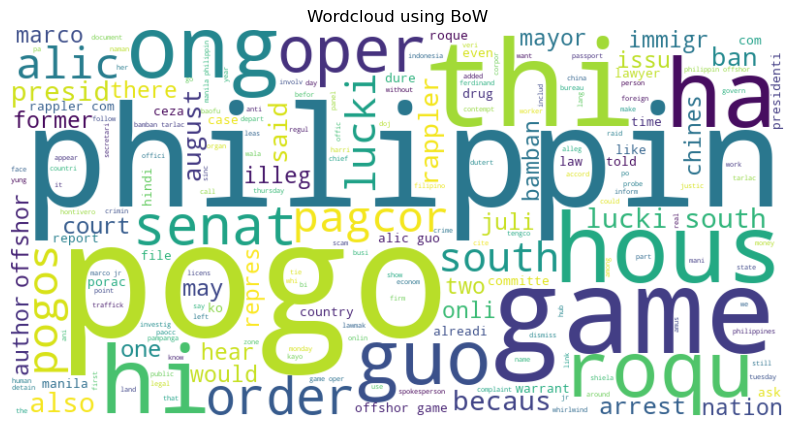

In [12]:
bow_frequencies = doc2vec_bow.sum(axis=0).sort_values(ascending=False)
print(bow_frequencies.head(5))
plot_wordcloud(bow_frequencies, 'Wordcloud using BoW')

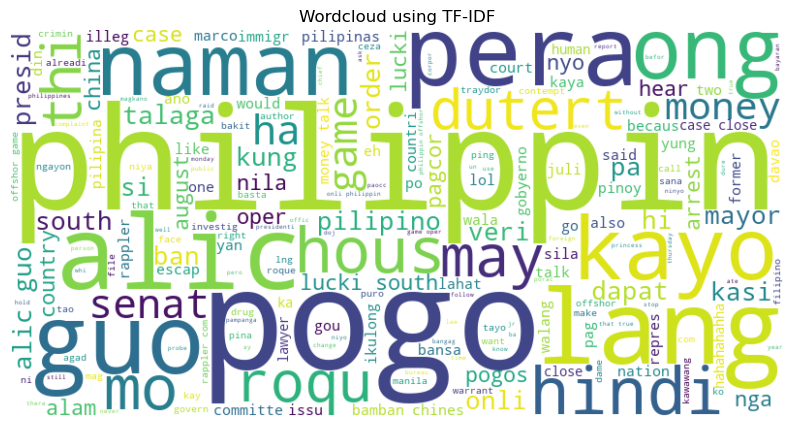

In [13]:
tfidf_frequencies = doc2vec_tfidf.sum(axis=0).sort_values(ascending=False)
tfidf_frequencies.head(5)
plot_wordcloud(tfidf_frequencies, 'Wordcloud using TF-IDF')